$$\textbf{Command lines}$$

../imfit NGC5379_i.fits -c config_sersic2.dat --mask NGC5379_mask2D_new.fits --psf psf_ngc5379.fits --sky=181.14672 --gain=6.565 readnoise=5.76 --save-model=model_sersic2.fits --save-residual=residual_sersic2.fits --save-params=params_sersic_2.dat

../imfit NGC5379_i.fits -c config_sersic2_exp.dat --mask NGC5379_mask2D_new.fits --psf psf_ngc5379.fits --sky=181.14672 --gain=6.565 readnoise=5.76 --save-model=model_sersic2_exp.fits --save-residual=residual_sersic2_exp.fits --save-params=params_sersic_2_exp.dat

../imfit NGC5379_i.fits -c config_sersic3_test.dat --mask NGC5379_mask2D_new.fits --psf psf_ngc5379.fits --sky=181.14672 --gain=6.565 readnoise=5.76 --save-model=model_sersic3.fits --save-residual=residual_sersic3.fits --save-params=params_sersic_3.dat

../makeimage sersic2_1_for_image.dat --output sersic2_1.fits
../makeimage sersic2_2_for_image.dat --output sersic2_2.fits

../makeimage sersic2exp_1_for_image.dat --output sersic2exp_1.fits
../makeimage sersic2exp_2_for_image.dat --output sersic2exp_2.fits
../makeimage sersic2exp_exp_for_image.dat --output sersic2exp_exp.fits

../makeimage sersic3_1_for_image_test.dat --output sersic3_1_test.fits
../makeimage sersic3_2_for_image_test.dat --output sersic3_2_test.fits
../makeimage sersic3_3_for_image_test.dat --output sersic3_3_test.fits

In [268]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.isophote import Ellipse, EllipseGeometry, build_ellipse_model
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [269]:
fits_path = '/home/pablo/Desktop/master/extragalactica/imfit-1.9.0/practica/NGC5379_i.fits'
mask_path = '/home/pablo/Desktop/master/extragalactica/imfit-1.9.0/practica/NGC5379_mask2D_new.fits'

hdu = fits.open(fits_path)
data = hdu[0].data
hdu.close()

hdu_mask = fits.open(mask_path)
mask = hdu_mask[0].data
hdu_mask.close()

mask = np.where(mask==1, 0, 1)
masked_data = data*mask

Object  =I_recor.fits                                                            [astropy.io.fits.card]
Instrument =                                                                     [astropy.io.fits.card]
Input center =       266.02362       203.83672                                   [astropy.io.fits.card]
Best fit parameters                                                              [astropy.io.fits.card]
Ie(counts) =         99.619281                                                   [astropy.io.fits.card]
Re(arcsec) =         9.8355211                                                   [astropy.io.fits.card]
I0(counts) =          339.12503                                                  [astropy.io.fits.card]
h(arcsec) =       38.336580                                                      [astropy.io.fits.card]


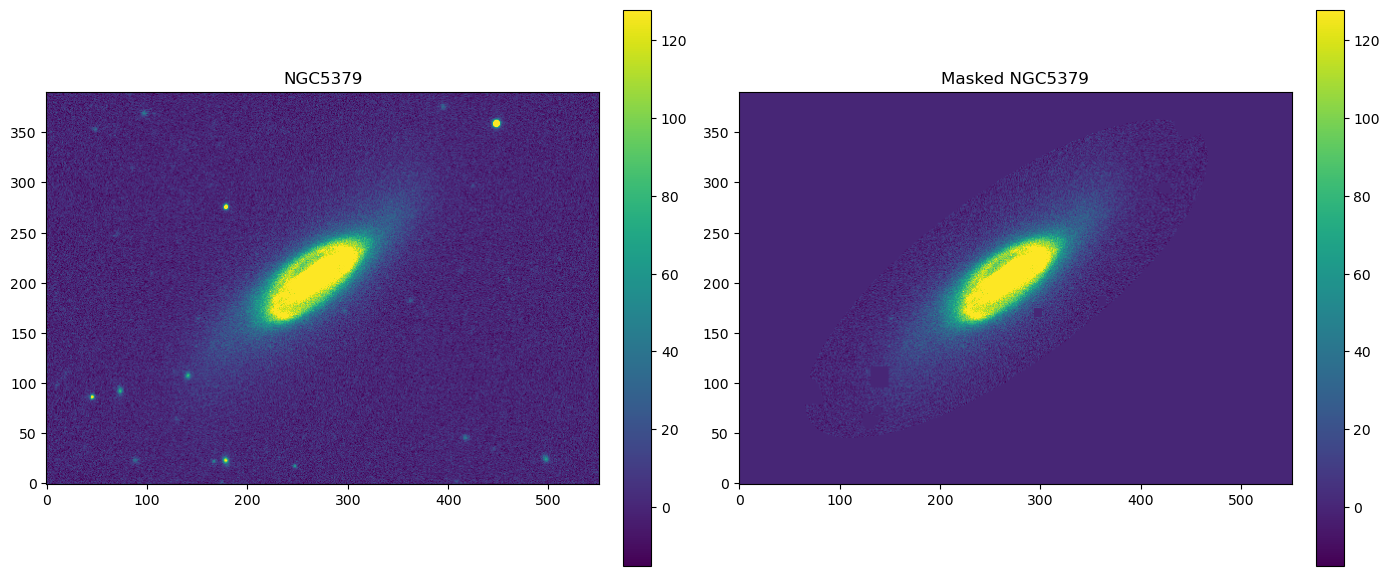

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(data, origin='lower', cmap='viridis', 
                 vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
ax1.set_title("NGC5379")
fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)

im2 = ax2.imshow(masked_data, origin='lower', cmap='viridis', 
                 vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
ax2.set_title("Masked NGC5379")
fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [271]:
# Initial geometry guess
ny, nx = data.shape
x0 = nx / 2  # x center
y0 = ny / 2  # y center
sma = min(nx, ny) / 5  # Semi-major axis guess 
eps = 0.2  # Ellipticity guess 
pa = 140 * np.pi / 4  # Position angle guess

geometry = EllipseGeometry(x0=x0, y0=y0, sma=sma, eps=eps, pa=pa)

# Perform ellipse fitting
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image(step=0.05)

ellipse_masked = Ellipse(masked_data, geometry)
isolist_masked = ellipse_masked.fit_image(step=0.05)

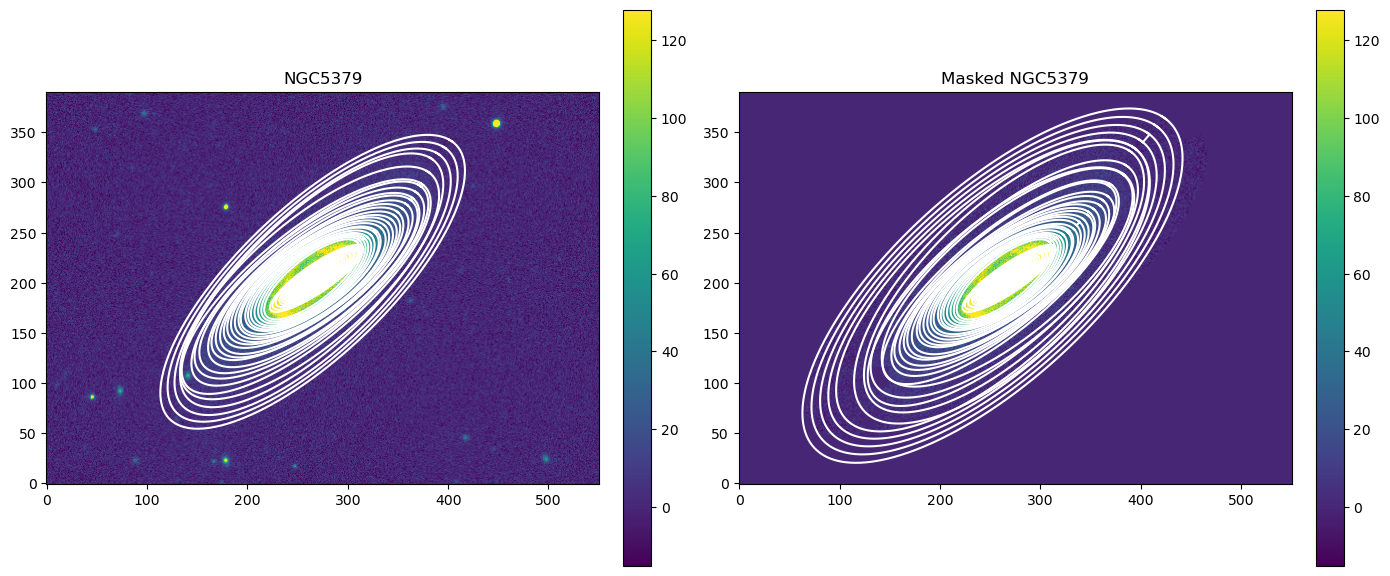

In [272]:
fig_iso, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(data, origin='lower', cmap='viridis', 
                 vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
ax1.set_title("NGC5379")
fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)

for iso in isolist:
    x, y = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

im2 = ax2.imshow(masked_data, origin='lower', cmap='viridis', 
                 vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
ax2.set_title("Masked NGC5379")
fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)

for iso in isolist_masked:
    x, y = iso.sampled_coordinates()
    ax2.plot(x, y, color='white')

plt.tight_layout()
plt.show()

In [273]:
table = isolist_masked.to_table()
isolist_masked.to_table()

<QTable length=128>
       sma                intens             intens_err     ... niter stop_code
                                                            ...                
     float64             float64              float64       ... int64   int64  
------------------ -------------------- ------------------- ... ----- ---------
               0.0   1625.8482294199425                 0.0 ...     0         0
0.5136992703454959    1618.911241329054   0.736182084285013 ...    10         0
0.5393842338627707   1618.3382090037899  0.7512802790992138 ...    10         0
0.5663534455559093   1618.0584409742294  0.6468407508550366 ...    43         0
0.5946711178337047   1606.6823418275299  1.3614222099070608 ...    14         0
  0.62440467372539    1600.809160174436   2.793975205959495 ...    10         0
0.6556249074116596   1593.6286691130845  2.8765948336119065 ...    10         0
0.6884061527822426    1586.881936983587    3.08450422263667 ...    10         0
0.7228264604213548   1580.8680038910918   3.987826444437505 ...    10         0
               ...                  ...                 ... ...   ...       ...
154.83065107616096    5.018308492445423  0.2008661419593918 ...    50         2
  162.572183629969   3.8823262914481256  0.1928737884557964 ...    14         0
170.70079281146747   3.4894839908709856  0.1797907755823103 ...    10         0
179.23583245204085    2.523618281080794 0.16854197546131225 ...    13         0
 188.1976240746429   1.4400487146896506 0.16979913860056112 ...    10         0
197.60750527837504   1.4617214424005658 0.16399104341399864 ...    37         0
 207.4878805422938   0.7669315607116903 0.12940949084395706 ...     3         5
 217.8622745694085  0.32854134053861983 0.10223904852391819 ...    50         2
228.75538829787894  0.14954575571196663 0.08392387263411925 ...     4         5
 240.1931577127729 0.060885801019749095 0.06034589366343908 ...     5         5

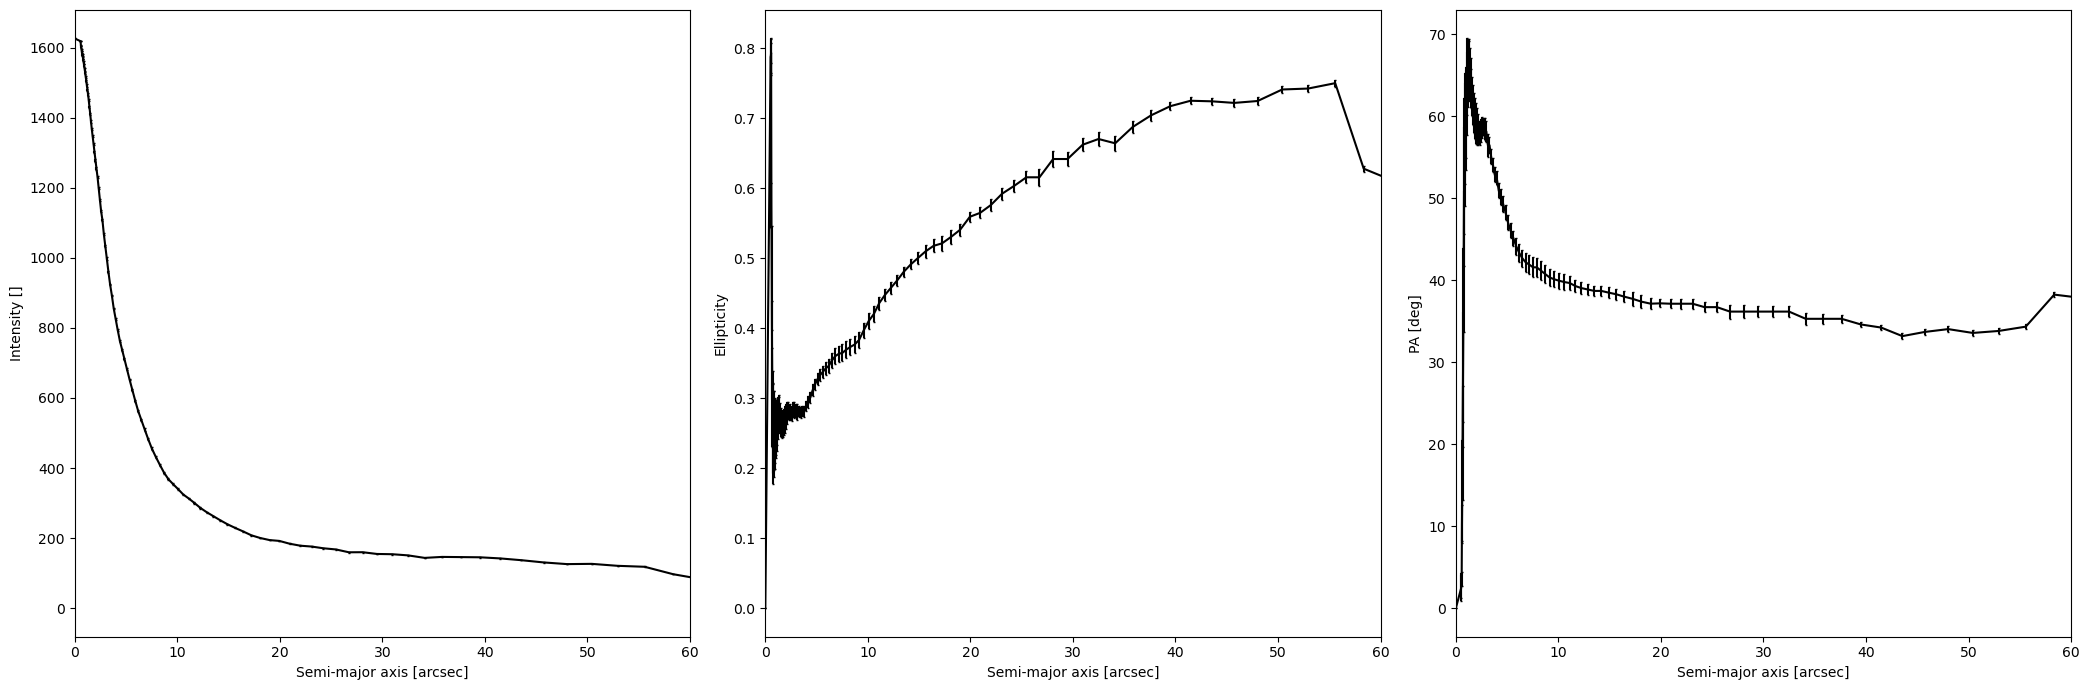

In [274]:
iso_sma = table['sma']
iso_intens = table['intens']
iso_intens_err = table['intens_err']
iso_elip = table['ellipticity']
iso_elip_err = table['ellipticity_err']
iso_pa = table['pa']
iso_pa_err = table['pa_err']


fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharex=True)

axes[0].errorbar(iso_sma, iso_intens, yerr=iso_intens_err, color='k', capsize=1)
axes[0].set_xlabel('Semi-major axis [arcsec]')
axes[0].set_ylabel('Intensity []')
axes[0].set_xlim(0, 60)

axes[1].errorbar(iso_sma, iso_elip, yerr=iso_elip_err, color='k', capsize=1)
axes[1].set_xlabel('Semi-major axis [arcsec]')
axes[1].set_ylabel('Ellipticity')
axes[1].set_xlim(0, 60)

axes[2].errorbar(iso_sma, iso_pa, yerr=iso_pa_err, color='k', capsize=1)
axes[2].set_xlabel('Semi-major axis [arcsec]')
axes[2].set_ylabel(r'PA [deg]')
axes[2].set_xlim(0, 60)


plt.tight_layout()
plt.show()

In [275]:
# Create a model image with the fitted ellipses
model_image = build_ellipse_model(data.shape, isolist)
model_image_masked = build_ellipse_model(masked_data.shape, isolist_masked)

residual = data - model_image
residual_masked = masked_data - model_image_masked

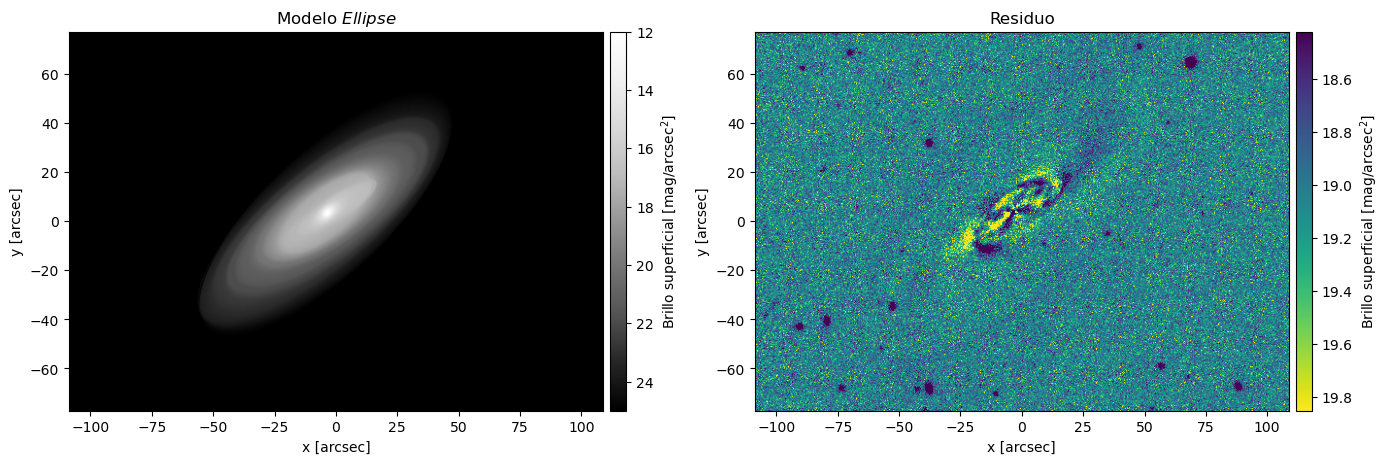

In [276]:
calibration_constant = 23.6448
pixel_scale = 0.396

y_arcsec = (np.arange(data.shape[0]) - np.arange(data.shape[0])[-1]/2) * pixel_scale
x_arcsec = (np.arange(data.shape[1]) - np.arange(data.shape[1])[-1]/2) * pixel_scale

model_image_mag = -5 * np.log10(model_image + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
residual_mag = -5 * np.log10(residual - np.min(residual) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)

fig, (ax1, ax2) = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

im1 = ax1.imshow(model_image_mag, origin='lower', cmap='Greys',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=12, 
                 vmax=25)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig.colorbar(im1, cax=cax)

im2 = ax2.imshow(residual_mag, origin='lower', cmap='viridis',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(residual_mag, 1), 
                 vmax=np.percentile(residual_mag, 99))

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_2 = fig.colorbar(im2, cax=cax)

ax1.set_title(r'Modelo $Ellipse$'), ax2.set_title('Residuo')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_2.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()


$$\textbf{Plots for the report}$$

In [277]:
path = '/home/pablo/Desktop/master/extragalactica/imfit-1.9.0/practica/'

hdu = fits.open(path+'NGC5379_i.fits')
ngc5379_adu = hdu[0].data
hdu.close()

hdu = fits.open(path+'model_sersic2.fits')
model_sersic_2 = hdu[0].data
hdu.close()

hdu = fits.open(path+'model_sersic2_exp.fits')
model_sersic_2_exp = hdu[0].data
hdu.close()

hdu = fits.open(path+'model_sersic3.fits')
model_sersic_3 = hdu[0].data
hdu.close()

hdu = fits.open(path+'residual_sersic1.fits')
residual_sersic_1 = hdu[0].data
hdu.close()

hdu = fits.open(path+'residual_sersic2.fits')
residual_sersic_2 = hdu[0].data
hdu.close()

hdu = fits.open(path+'residual_sersic2_exp.fits')
residual_sersic_2_exp = hdu[0].data
hdu.close()

hdu = fits.open(path+'residual_sersic3.fits')
residual_sersic_3 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic1_modelo2S.fits')
sersic2_1 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic2_modelo2S.fits')
sersic2_2 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic2exp_1.fits')
sersic2exp_1 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic2exp_2.fits')
sersic2exp_2 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic2exp_exp.fits')
sersic2exp_exp = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic3_1_test.fits')
sersic3_1 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic3_modelo3S.fits')
sersic3_2 = hdu[0].data
hdu.close()

hdu = fits.open(path+'sersic3_3_test.fits')
sersic3_3 = hdu[0].data
hdu.close()

/tmp/ipykernel_5239/196811255.py:4: RuntimeWarning: divide by zero encountered in log10
  ngc5379_mag = -5 * np.log10(ngc5379_adu - np.min(ngc5379_adu)) + calibration_constant - 5 * np.log10(pixel_scale**2)
/tmp/ipykernel_5239/196811255.py:11: RuntimeWarning: invalid value encountered in multiply
  im1 = ax1.imshow(ngc5379_mag*mask, origin='lower', cmap='Greys',


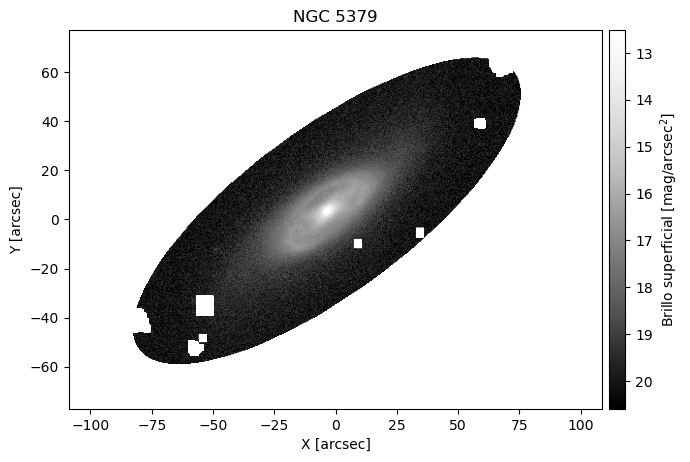

In [278]:
calibration_constant = 23.6448
pixel_scale = 0.396

ngc5379_mag = -5 * np.log10(ngc5379_adu - np.min(ngc5379_adu)) + calibration_constant - 5 * np.log10(pixel_scale**2)

y_arcsec = (np.arange(ngc5379_mag.shape[0]) - np.arange(ngc5379_mag.shape[0])[-1]/2) * pixel_scale
x_arcsec = (np.arange(ngc5379_mag.shape[1]) - np.arange(ngc5379_mag.shape[1])[-1]/2) * pixel_scale

fig_ngc5379, ax1 = plt.subplots(1, 1, figsize=(7, 7))

im1 = ax1.imshow(ngc5379_mag*mask, origin='lower', cmap='Greys',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(ngc5379_mag, 0.01), 
                 vmax=np.percentile(ngc5379_mag, 90))

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_ngc5379.colorbar(im1, cax=cax)

ax1.set_title('NGC 5379')
ax1.set_xlabel(r'X [arcsec]'), ax1.set_ylabel(r'Y [arcsec]')
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

fig_ngc5379.savefig('/home/pablo/Desktop/master/extragalactica/images/ngc5379_masked_data.pdf')

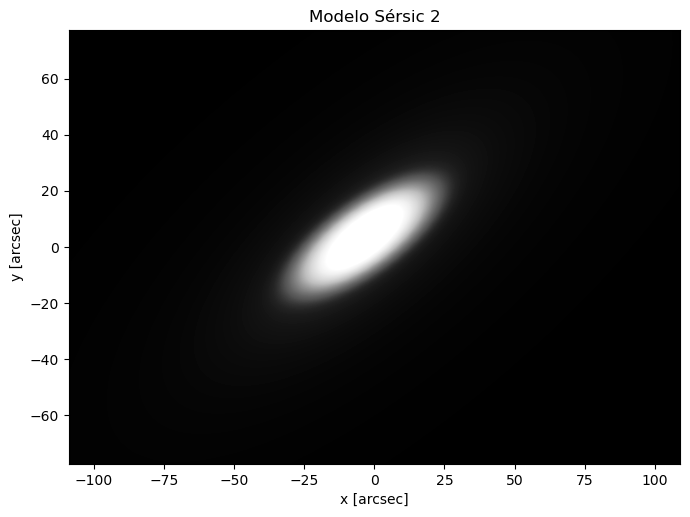

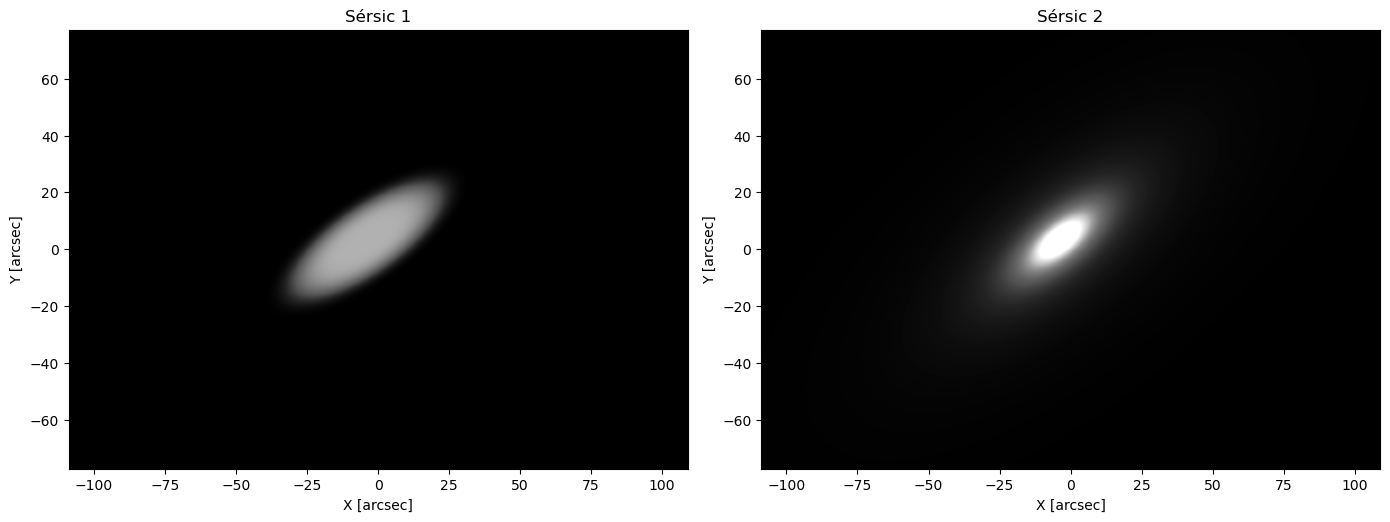

In [279]:
fig_sersic2, ax1 = plt.subplots(1, 1, figsize=(7, 7))

im1 = ax1.imshow(model_sersic_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

ax1.set_title('Modelo Sérsic 2')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

fig_sersic2_comp, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(sersic2_1, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

im2 = ax2.imshow(sersic2_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

ax1.set_title('Sérsic 1'), ax2.set_title('Sérsic 2')
ax1.set_xlabel(r'X [arcsec]'), ax1.set_ylabel(r'Y [arcsec]')
ax2.set_xlabel(r'X [arcsec]'), ax2.set_ylabel(r'Y [arcsec]')

plt.tight_layout()
plt.show()

fig_sersic2_comp.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic2_components.pdf')

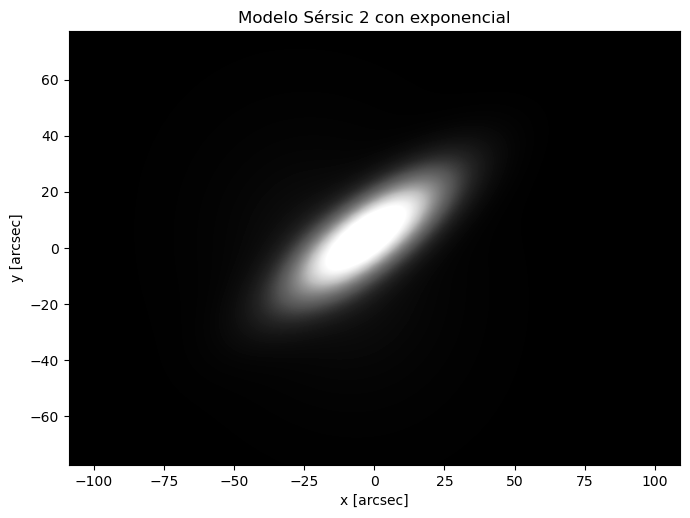

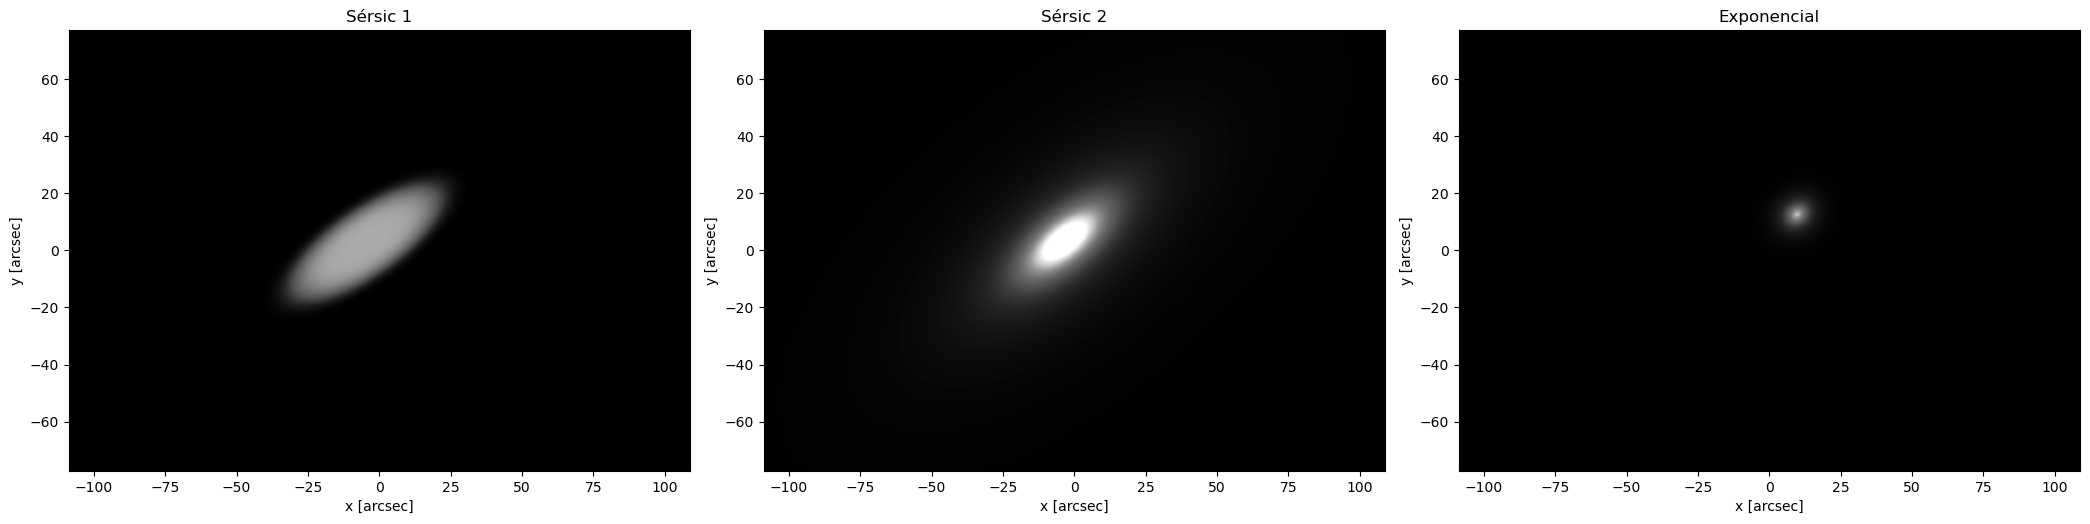

In [280]:
fig_sersic2exp, ax1 = plt.subplots(1, 1, figsize=(7, 7))

im1 = ax1.imshow(model_sersic_2_exp, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

ax1.set_title('Modelo Sérsic 2 con exponencial')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

fig_sersic2exp_comp, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

im1 = ax1.imshow(sersic2exp_1, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

im2 = ax2.imshow(sersic2exp_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

im3 = ax3.imshow(sersic2exp_exp, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

ax1.set_title('Sérsic 1'), ax2.set_title('Sérsic 2'), ax3.set_title('Exponencial')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
ax3.set_xlabel(r'x [arcsec]'), ax3.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

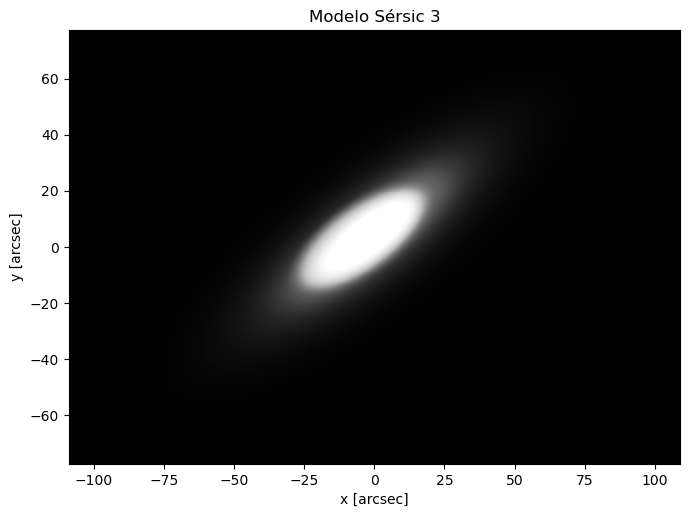

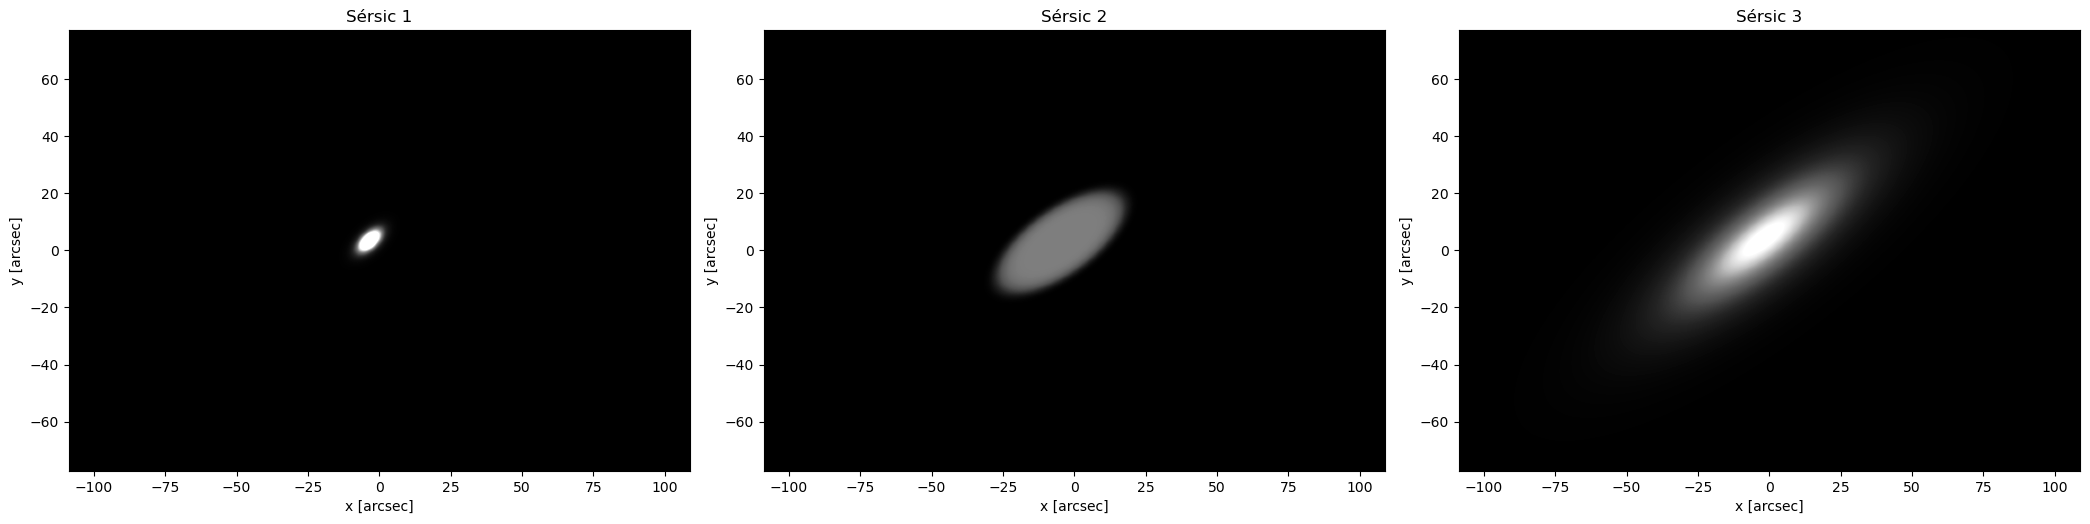

In [281]:
fig_sersic3, ax1 = plt.subplots(1, 1, figsize=(7, 7))

im1 = ax1.imshow(model_sersic_3, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

ax1.set_title('Modelo Sérsic 3')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

fig_sersic3_comp, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

im1 = ax1.imshow(sersic3_1, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

im2 = ax2.imshow(sersic3_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

im3 = ax3.imshow(sersic3_3, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

ax1.set_title('Sérsic 1'), ax2.set_title('Sérsic 2'), ax3.set_title('Sérsic 3')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
ax3.set_xlabel(r'x [arcsec]'), ax3.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

fig_sersic3_comp.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic3_components.pdf')

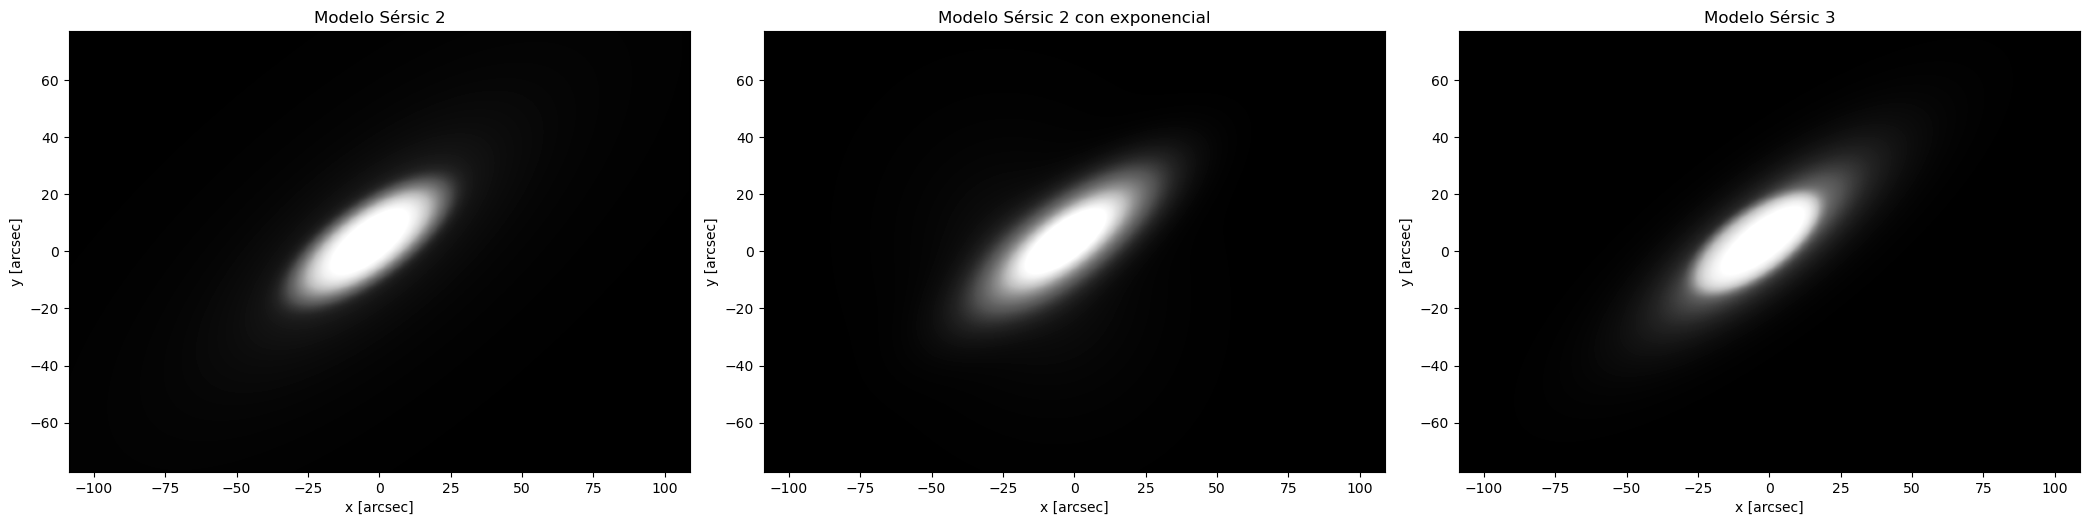

In [282]:
fig_models_sersic, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

im1 = ax1.imshow(model_sersic_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

im2 = ax2.imshow(model_sersic_2_exp, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

im3 = ax3.imshow(model_sersic_3, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))


ax1.set_title('Modelo Sérsic 2'), ax2.set_title('Modelo Sérsic 2 con exponencial'), ax3.set_title('Modelo Sérsic 3')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
ax3.set_xlabel(r'x [arcsec]'), ax3.set_ylabel(r'y [arcsec]')

plt.tight_layout()
plt.show()

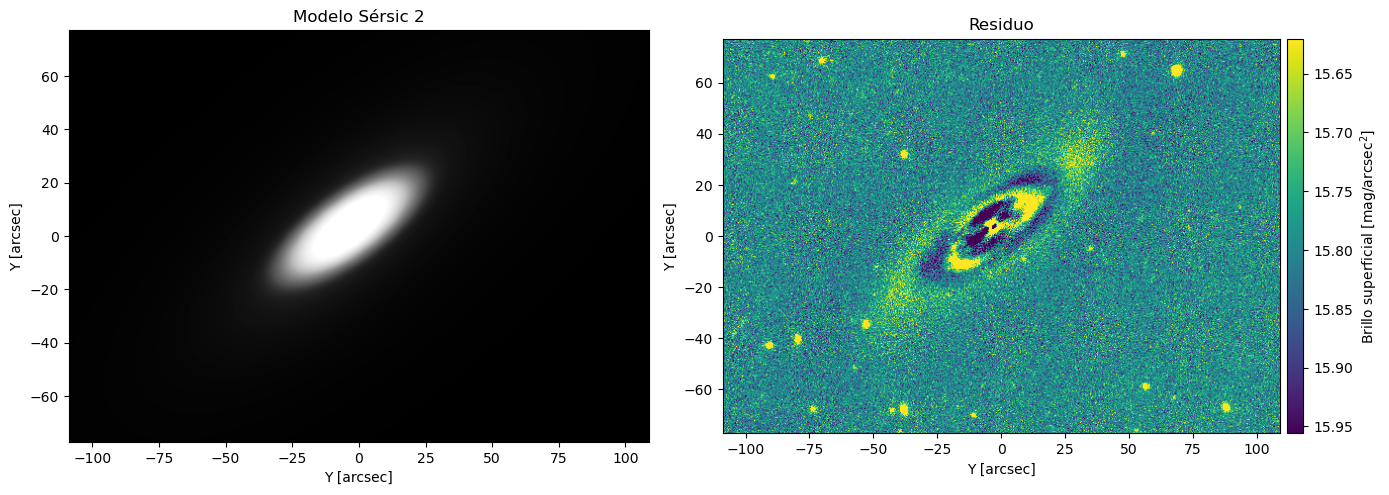

In [283]:
residual_sersic_2_mag = -5 * np.log10(residual_sersic_2 - np.min(residual_sersic_2) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)

fig_model_sersic_2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(model_sersic_2, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

im2 = ax2.imshow(residual_sersic_2_mag, origin='lower', cmap='viridis_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(residual_sersic_2_mag, 1), 
                 vmax=np.percentile(residual_sersic_2_mag, 99))

ax1.set_title('Modelo Sérsic 2'), ax2.set_title('Residuo')
ax1.set_xlabel(r'Y [arcsec]'), ax1.set_ylabel(r'Y [arcsec]')
ax2.set_xlabel(r'Y [arcsec]'), ax2.set_ylabel(r'Y [arcsec]')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_model_sersic_2.colorbar(im2, cax=cax)
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

fig_model_sersic_2.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic2_residual.pdf')

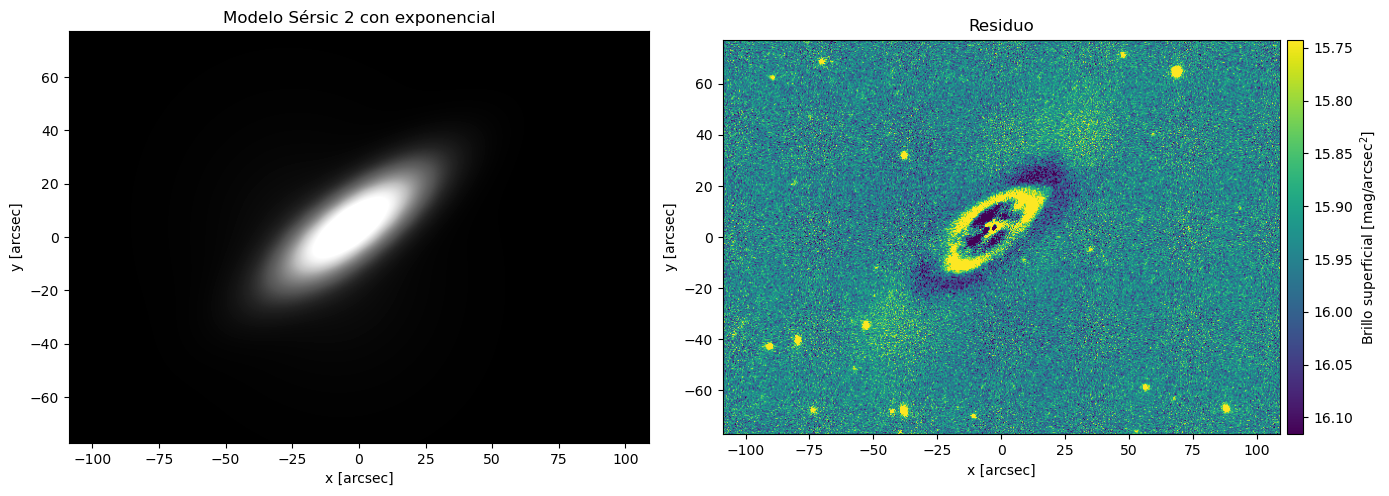

In [284]:
residual_sersic_2_exp_mag = -5 * np.log10(residual_sersic_2_exp - np.min(residual_sersic_2_exp) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)

fig_model_sersic_2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(model_sersic_2_exp, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_2_exp, 1), 
                 vmax=np.percentile(model_sersic_2_exp, 99))

im2 = ax2.imshow(residual_sersic_2_exp_mag, origin='lower', cmap='viridis_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(residual_sersic_2_exp_mag, 1), 
                 vmax=np.percentile(residual_sersic_2_exp_mag, 99))

ax1.set_title('Modelo Sérsic 2 con exponencial'), ax2.set_title('Residuo')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_model_sersic_2.colorbar(im2, cax=cax)
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

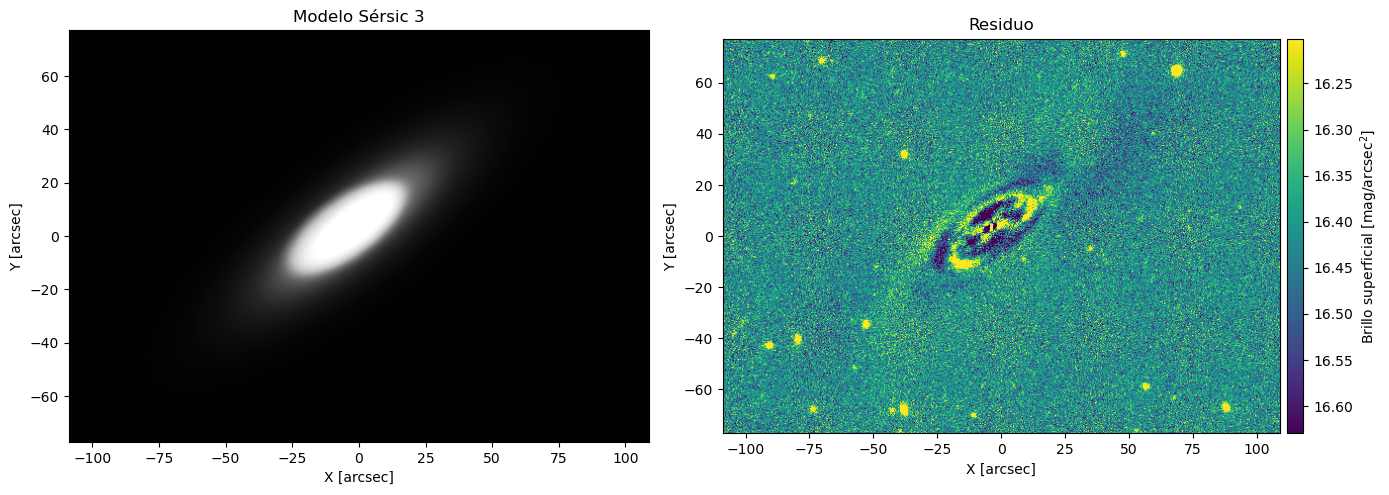

In [285]:
residual_sersic_3_mag = -5 * np.log10(residual_sersic_3 - np.min(residual_sersic_3) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)

fig_model_sersic_3, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

im1 = ax1.imshow(model_sersic_3, origin='lower', cmap='Greys_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

im2 = ax2.imshow(residual_sersic_3_mag, origin='lower', cmap='viridis_r',
                 extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(residual_sersic_3_mag, 1), 
                 vmax=np.percentile(residual_sersic_3_mag, 99))

ax1.set_title('Modelo Sérsic 3'), ax2.set_title('Residuo')
ax1.set_xlabel(r'X [arcsec]'), ax1.set_ylabel(r'Y [arcsec]')
ax2.set_xlabel(r'X [arcsec]'), ax2.set_ylabel(r'Y [arcsec]')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_model_sersic_3.colorbar(im2, cax=cax)
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

fig_model_sersic_3.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic3_residual.pdf')


$$\textbf{Isophotes for Sérsic 2 and 3 models} $$

In [286]:
# Perform ellipse fitting
ellipse = Ellipse(data, EllipseGeometry(x0=263, y0=203, sma=80, eps=0.56, pa=125))
isolist = ellipse.fit_image(step=0.1)

ellipse_sersic_2 = Ellipse(model_sersic_2, EllipseGeometry(x0=263, y0=203, sma=80, eps=0.56, pa=125))
isolist_sersic_2 = ellipse_sersic_2.fit_image(step=0.1)

ellipse_sersic_3 = Ellipse(model_sersic_3, geometry)
isolist_sersic_3 = ellipse_sersic_3.fit_image(step=0.1)

ellipse_sersic_2_1 = Ellipse(sersic2_1, EllipseGeometry(x0=263, y0=203, sma=60, eps=0.6, pa=125))
isolist_sersic_2_1 = ellipse_sersic_2_1.fit_image(step=0.1, fix_center=False, fix_pa=False, fix_eps=False)

ellipse_sersic_2_2 = Ellipse(sersic2_2, EllipseGeometry(x0=263, y0=203, sma=70, eps=0.57, pa=129))
isolist_sersic_2_2 = ellipse_sersic_2_2.fit_image(step=0.1)

ellipse_sersic_3_1 = Ellipse(sersic3_1, EllipseGeometry(x0=263, y0=203, sma=10, eps=0.38, pa=133))
isolist_sersic_3_1 = ellipse_sersic_3_1.fit_image(step=0.1)

ellipse_sersic_3_2 = Ellipse(sersic3_2, EllipseGeometry(x0=263, y0=203, sma=50, eps=0.56, pa=125))
isolist_sersic_3_2 = ellipse_sersic_3_2.fit_image(step=0.1)

ellipse_sersic_3_3 = Ellipse(sersic3_3, EllipseGeometry(x0=263, y0=203, sma=100, eps=0.6, pa=127))
isolist_sersic_3_3 = ellipse_sersic_3_3.fit_image(step=0.1)

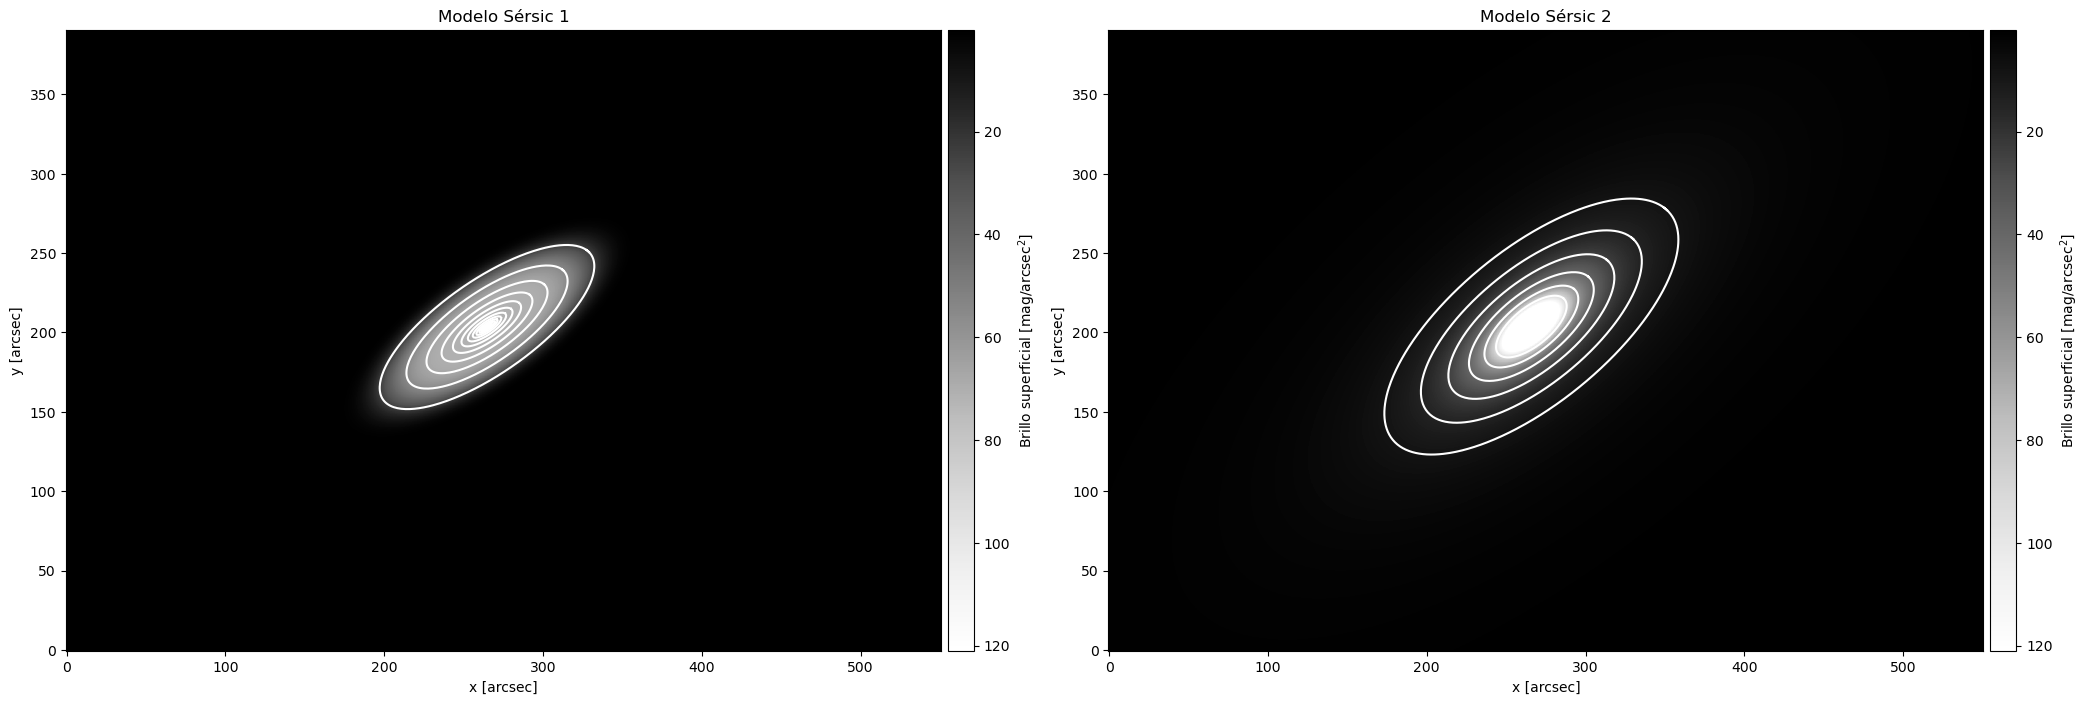

In [287]:
fig_sersic2_comp_iso, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7))

im1 = ax1.imshow(sersic2_1, origin='lower', cmap='Greys_r',
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))

im2 = ax2.imshow(sersic2_2, origin='lower', cmap='Greys_r',
                 vmin=np.percentile(model_sersic_2, 1), 
                 vmax=np.percentile(model_sersic_2, 99))


ax1.set_title('Sérsic 1'), ax2.set_title('Sérsic 2')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')

for iso in isolist_sersic_2_1[:-7][::3]:
    x, y = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

for iso in isolist_sersic_2_2[:-10][::3]:
    # if iso == isolist_sersic_2[-6] or iso == isolist_sersic_2[-7]:
    #     pass
    # else:
        x, y = iso.sampled_coordinates()
        ax2.plot(x, y, color='white')



divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_sersic2_comp_iso.colorbar(im1, cax=cax)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_2 = fig_sersic2_comp_iso.colorbar(im2, cax=cax)


ax1.set_title('Modelo Sérsic 1'), ax2.set_title('Modelo Sérsic 2')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_2.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

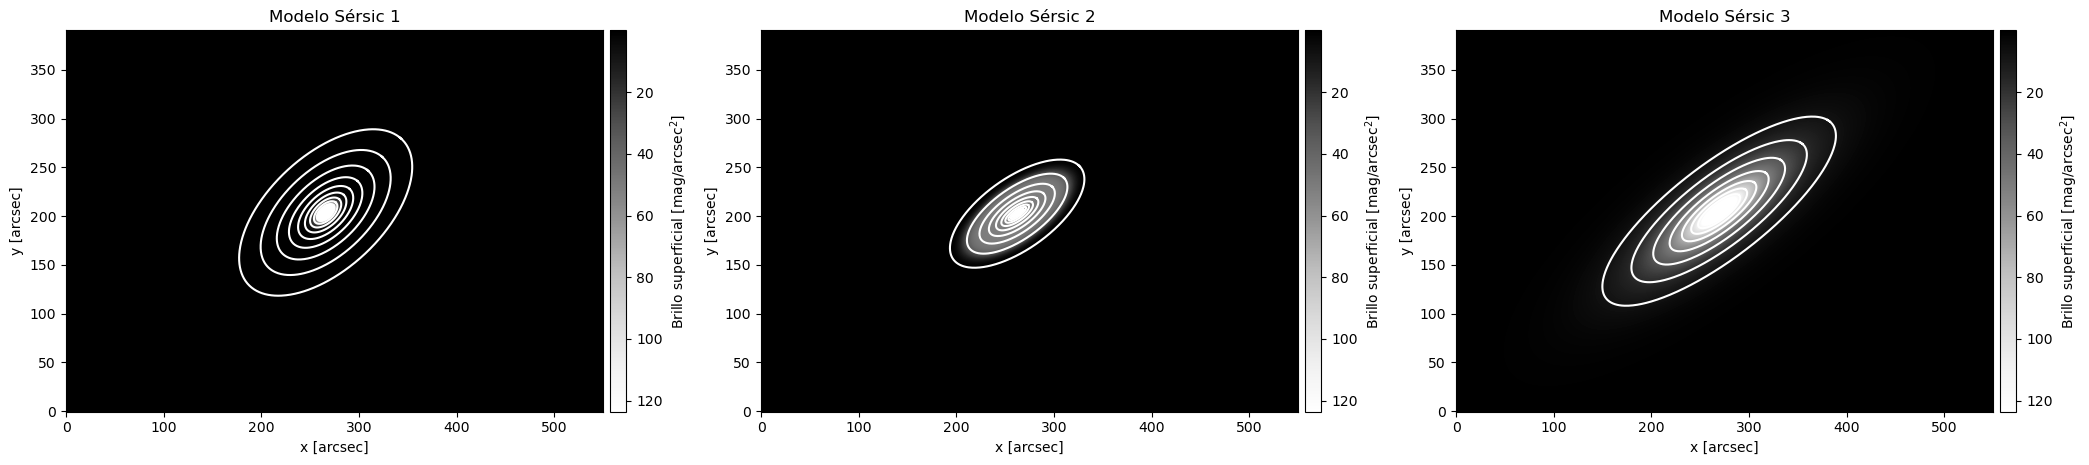

In [288]:
fig_sersic3_comp_iso, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

im1 = ax1.imshow(sersic3_1, origin='lower', cmap='Greys_r',
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

im2 = ax2.imshow(sersic3_2, origin='lower', cmap='Greys_r',
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

im3 = ax3.imshow(sersic3_3, origin='lower', cmap='Greys_r',
                 vmin=np.percentile(model_sersic_3, 1), 
                 vmax=np.percentile(model_sersic_3, 99))

ax1.set_title('Sérsic 1'), ax2.set_title('Sérsic 2'), ax3.set_title('Sérsic 3')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
ax3.set_xlabel(r'x [arcsec]'), ax3.set_ylabel(r'y [arcsec]')

for iso in isolist_sersic_3_1[:-10][::3]:
    x, y = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

for iso in isolist_sersic_3_2[:-4][::3]:
    # if iso == isolist_sersic_2[-6] or iso == isolist_sersic_2[-7]:
    #     pass
    # else:
        x, y = iso.sampled_coordinates()
        ax2.plot(x, y, color='white')

for iso in isolist_sersic_3_3[:-8][::3]:
    x, y = iso.sampled_coordinates()
    ax3.plot(x, y, color='white')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_sersic3_comp_iso.colorbar(im1, cax=cax)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_2 = fig_sersic3_comp_iso.colorbar(im2, cax=cax)

divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_3 = fig_sersic3_comp_iso.colorbar(im3, cax=cax)

ax1.set_title('Modelo Sérsic 1'), ax2.set_title('Modelo Sérsic 2'), ax3.set_title('Modelo Sérsic 3')
ax1.set_xlabel(r'x [arcsec]'), ax1.set_ylabel(r'y [arcsec]')
ax2.set_xlabel(r'x [arcsec]'), ax2.set_ylabel(r'y [arcsec]')
ax3.set_xlabel(r'x [arcsec]'), ax3.set_ylabel(r'y [arcsec]')
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_2.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_3.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

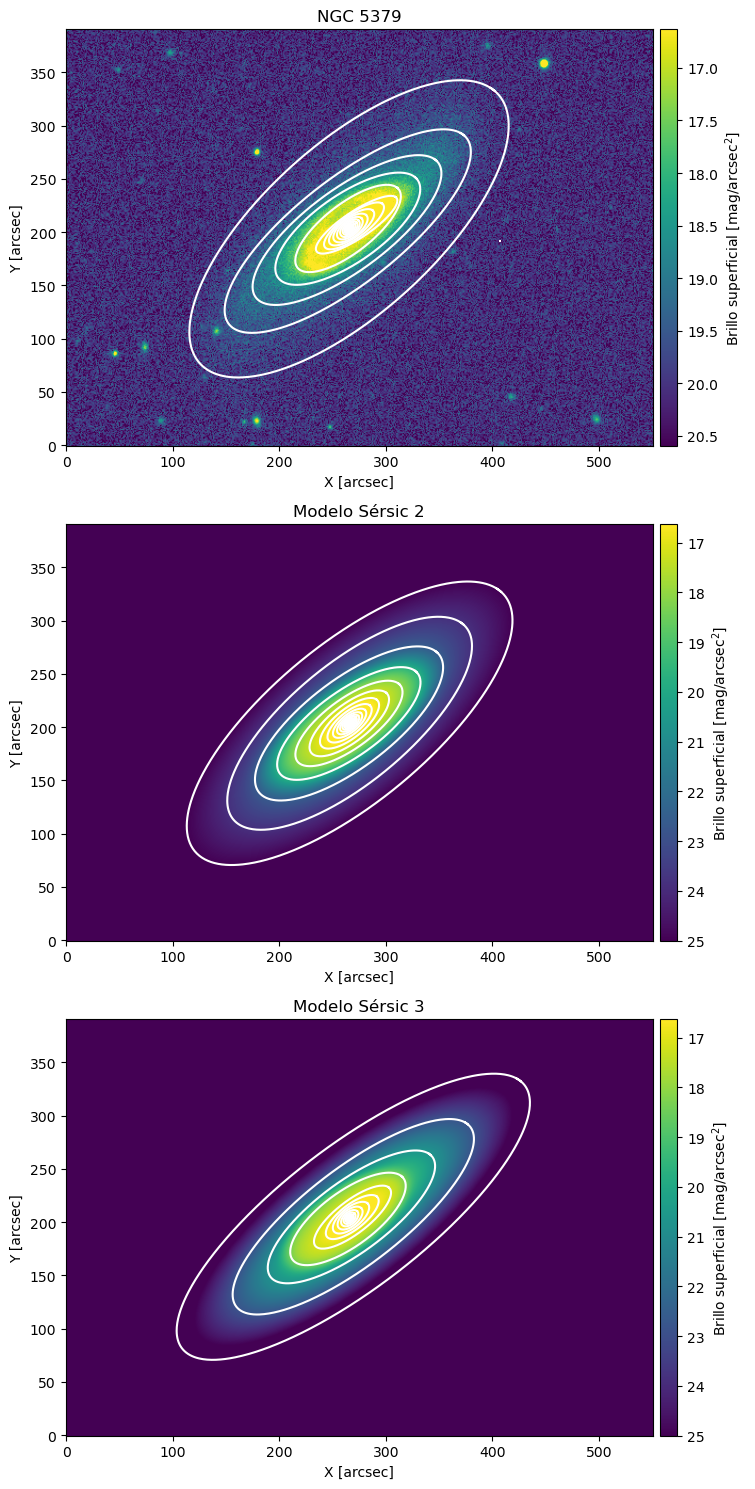

In [289]:
model_sersic_2_mag = -5 * np.log10(model_sersic_2 - np.min(model_sersic_2) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
model_sersic_3_mag = -5 * np.log10(model_sersic_3 - np.min(model_sersic_3) + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)

fig_isos, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.5, 15))

im1 = ax1.imshow(ngc5379_mag, origin='lower', cmap='viridis_r', 
                #  extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(ngc5379_mag, 1), 
                 vmax=np.percentile(ngc5379_mag, 90))

im2 = ax2.imshow(model_sersic_2_mag, origin='lower', cmap='viridis_r', 
                #  extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(ngc5379_mag, 1), 
                 vmax=25)

im3 = ax3.imshow(model_sersic_3_mag, origin='lower', cmap='viridis_r', 
                #  extent=[x_arcsec[0], x_arcsec[-1], y_arcsec[0], y_arcsec[-1]],
                 vmin=np.percentile(ngc5379_mag, 1), 
                 vmax=25)


for iso in isolist[:-2][::3]:
    x, y = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

for iso in isolist_sersic_2[:-5][::3]:
    x, y = iso.sampled_coordinates()
    ax2.plot(x, y, color='white')

for iso in isolist_sersic_3[:-4][::4]:
    # if iso == isolist_sersic_3[-7]:
    #     pass
    # else:
        x, y = iso.sampled_coordinates()
        ax3.plot(x, y, color='white')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar = fig_isos.colorbar(im1, cax=cax)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_2 = fig_isos.colorbar(im2, cax=cax)

divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="3%", pad=0.07)
cax.invert_yaxis()
cbar_3 = fig_isos.colorbar(im3, cax=cax)

ax1.set_title(r'NGC 5379'), ax2.set_title('Modelo Sérsic 2'), ax3.set_title('Modelo Sérsic 3')
ax1.set_xlabel(r'X [arcsec]'), ax1.set_ylabel(r'Y [arcsec]')
ax2.set_xlabel(r'X [arcsec]'), ax2.set_ylabel(r'Y [arcsec]')
ax3.set_xlabel(r'X [arcsec]'), ax3.set_ylabel(r'Y [arcsec]')
cbar.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_2.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')
cbar_3.set_label(r'Brillo superficial [$\mathrm{mag/arcsec^{2}}$]')

plt.tight_layout()
plt.show()

fig_isos.savefig('/home/pablo/Desktop/master/extragalactica/images/isochrones_ngc5379_sersic2_3.pdf')


$$\textbf{Bright profiles}$$

In [290]:
table_ngc5379 = isolist.to_table()
table_sersic2 = isolist_sersic_2.to_table()
table_sersic3 = isolist_sersic_3.to_table()
table_sersic2_1 = isolist_sersic_2_1.to_table()
table_sersic2_2 = isolist_sersic_2_2.to_table()
table_sersic3_1 = isolist_sersic_3_1.to_table()
table_sersic3_2 = isolist_sersic_3_2.to_table()
table_sersic3_3 = isolist_sersic_3_3.to_table()

ngc5379_sma = table_ngc5379['sma']*pixel_scale
ngc5379_intens = table_ngc5379['intens']
ngc5379_intens_err = table_ngc5379['intens_err']

sersic_2_sma = table_sersic2['sma']*pixel_scale
sersic_2_intens = table_sersic2['intens']
sersic_2_intens_err = table_sersic2['intens_err']

sersic_3_sma = table_sersic3['sma']*pixel_scale
sersic_3_intens = table_sersic3['intens']
sersic_3_intens_err = table_sersic3['intens_err']

sersic_2_1_sma = table_sersic2_1['sma']*pixel_scale
sersic_2_1_intens = table_sersic2_1['intens']

sersic_2_2_sma = table_sersic2_2['sma']*pixel_scale
sersic_2_2_intens = table_sersic2_2['intens']

sersic_3_1_sma = table_sersic3_1['sma']*pixel_scale
sersic_3_1_intens = table_sersic3_1['intens']

sersic_3_2_sma = table_sersic3_2['sma']*pixel_scale
sersic_3_2_intens = table_sersic3_2['intens']

sersic_3_3_sma = table_sersic3_3['sma']*pixel_scale
sersic_3_3_intens = table_sersic3_3['intens']

In [291]:
ngc5379_mu = -5 * np.log10(ngc5379_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
ngc5379_mu_err = -5 / np.log(10) / ngc5379_intens
sersic_2_mu = -5 * np.log10(sersic_2_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_3_mu = -5 * np.log10(sersic_3_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_2_1_mu = -5 * np.log10(sersic_2_1_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_2_2_mu = -5 * np.log10(sersic_2_2_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_3_1_mu = -5 * np.log10(sersic_3_1_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_3_2_mu = -5 * np.log10(sersic_3_2_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)
sersic_3_3_mu = -5 * np.log10(sersic_3_3_intens + 1e-10) + calibration_constant - 5 * np.log10(pixel_scale**2)


In [292]:
sersic_2_mu_interp = np.interp(ngc5379_sma, sersic_2_sma, sersic_2_mu)
sersic_3_mu_interp = np.interp(ngc5379_sma, sersic_3_sma, sersic_3_mu)

distance_mpc = 24.6
arcsec_to_kpc = distance_mpc / 206.265

def arcsec_to_kpc_conversion(arcsec):
    return arcsec * arcsec_to_kpc

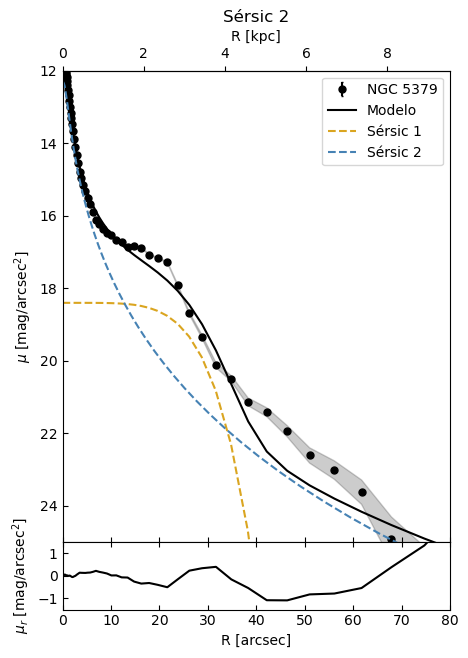

In [293]:
fig_sersic2 = plt.figure(figsize=(5, 7))
gs2 = gridspec.GridSpec(2, 1, height_ratios=[7, 1], hspace=0)


axes_sersic2 = fig_sersic2.add_subplot(gs2[0, 0])
axes_sersic2.errorbar(ngc5379_sma, ngc5379_mu, color='k', yerr=0, fmt='o', capsize=1, markersize=5, label='NGC 5379')
axes_sersic2.fill_between(ngc5379_sma, ngc5379_mu - ngc5379_mu_err, ngc5379_mu + ngc5379_mu_err, color='k', alpha=0.2)
axes_sersic2.errorbar(sersic_2_sma, sersic_2_mu, color='k', fmt='-', capsize=1, label='Modelo')
axes_sersic2.errorbar(sersic_2_1_sma, sersic_2_1_mu, color='goldenrod', fmt='--', capsize=1, label='Sérsic 1')
axes_sersic2.errorbar(sersic_2_2_sma, sersic_2_2_mu, color='steelblue', fmt='--', capsize=1, label='Sérsic 2')
axes_sersic2.set_title('Sérsic 2')
axes_sersic2.set_ylabel(r'$\mu$ [$\mathrm{mag/arcsec^{2}}$]')
axes_sersic2.set_xlim(0, 80)
axes_sersic2.set_ylim(12, 25)
axes_sersic2.invert_yaxis()
axes_sersic2.legend()
axes_sersic2.tick_params(axis='x', labelbottom=False)

residuals_sersic2 = fig_sersic2.add_subplot(gs2[1, 0], sharex=axes_sersic2)
residuals_sersic2.plot(ngc5379_sma, ngc5379_mu - sersic_2_mu_interp, color='k')
residuals_sersic2.set_xlim(0, 80)
residuals_sersic2.set_ylim(-1.5, 1.5)
residuals_sersic2.set_ylabel(r'$\mu_{r}$ [$\mathrm{mag/arcsec^{2}}$]')
residuals_sersic2.set_xlabel('R [arcsec]')

residuals_sersic2.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
residuals_sersic2.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))

axes_sersic2.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))
axes_sersic2.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
residuals_sersic2.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))
residuals_sersic2.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
axes_sersic2.tick_params(axis='both', labelbottom=False, bottom=True, direction ='in')
residuals_sersic2.tick_params(axis='both', labelbottom=True, bottom=True, top='True', direction ='in')

secax = axes_sersic2.secondary_xaxis('top', functions=(arcsec_to_kpc_conversion, lambda kpc: kpc / arcsec_to_kpc))
secax.set_xlabel('R [kpc]')

plt.show()

fig_sersic2.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic2_mu.pdf')


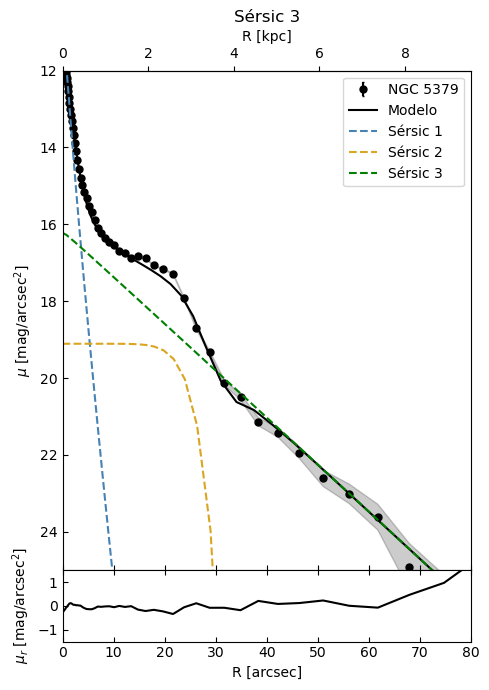

In [294]:
fig_sersic3 = plt.figure(figsize=(5, 7))
gs3 = gridspec.GridSpec(2, 1, height_ratios=[7, 1], hspace=0)

axes_sersic3 = fig_sersic3.add_subplot(gs3[0, 0])
axes_sersic3.errorbar(ngc5379_sma, ngc5379_mu, color='k', yerr=0, fmt='o', capsize=1, markersize=5, label='NGC 5379')
axes_sersic3.fill_between(ngc5379_sma, ngc5379_mu - ngc5379_mu_err, ngc5379_mu + ngc5379_mu_err, color='k', alpha=0.2)
axes_sersic3.errorbar(sersic_3_sma, sersic_3_mu, color='k', fmt='-', capsize=1, label='Modelo')
axes_sersic3.errorbar(sersic_3_1_sma, sersic_3_1_mu, color='steelblue', fmt='--', capsize=1, label='Sérsic 1')
axes_sersic3.errorbar(sersic_3_2_sma, sersic_3_2_mu, color='goldenrod', fmt='--', capsize=1, label='Sérsic 2')
axes_sersic3.errorbar(sersic_3_3_sma, sersic_3_3_mu, color='green', fmt='--', capsize=1, label='Sérsic 3')
axes_sersic3.set_title('Sérsic 3')
axes_sersic3.set_ylabel(r'$\mu$ [$\mathrm{mag/arcsec^{2}}$]')
axes_sersic3.set_xlim(0, 80)
axes_sersic3.set_ylim(12, 25)
axes_sersic3.invert_yaxis()
axes_sersic3.legend()

axes_sersic3.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
axes_sersic3.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
axes_sersic3.tick_params(axis='x', labelbottom=False, bottom=True, direction ='in')

# Subplot inferior
residuals_sersic3 = fig_sersic3.add_subplot(gs3[1, 0], sharex=axes_sersic3)
residuals_sersic3.plot(ngc5379_sma, ngc5379_mu - sersic_3_mu_interp, color='k')
residuals_sersic3.set_xlim(0, 80)
residuals_sersic3.set_ylim(-1.5, 1.5)
residuals_sersic3.set_ylabel(r'$\mu_{r}$ [$\mathrm{mag/arcsec^{2}}$]')
residuals_sersic3.set_xlabel('R [arcsec]')

residuals_sersic3.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
residuals_sersic3.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))

axes_sersic3.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))
axes_sersic3.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
residuals_sersic3.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))
residuals_sersic3.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
axes_sersic3.tick_params(axis='both', labelbottom=False, bottom=True, direction ='in')
residuals_sersic3.tick_params(axis='both', labelbottom=True, bottom=True, top='True', direction ='in')

secax = axes_sersic3.secondary_xaxis('top', functions=(arcsec_to_kpc_conversion, lambda kpc: kpc / arcsec_to_kpc))
secax.set_xlabel('R [kpc]')

plt.tight_layout()
plt.show()

fig_sersic3.savefig('/home/pablo/Desktop/master/extragalactica/images/sersic3_mu.pdf')